In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from haversine import haversine 
from progressbar import ProgressBar

In [59]:
#Read the CSV data file as a pandas dataframe
listings = pd.read_csv('data/airbnb_listings.csv')
stations = pd.read_csv('data/train_stations.csv')

In [60]:
#Load the locations of the railway stations in a list
stations_list = []
for i in range(0,len(stations)):
    tup = (stations['Lat'][i],stations['Long'][i])
    stations_list.append(tup)

In [61]:
#Import the for loop progress bar
pbar = ProgressBar()

In [62]:
listings.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [63]:
stations.head()

,City,Name,Lat,Long
0,NYC,Astor Pl,40.730054,-73.991070
1,NYC,Canal St,40.718803,-74.000193
2,NYC,50th St,40.761728,-73.983849
3,NYC,Bergen St,40.680862,-73.974999
4,NYC,Pennsylvania Ave,40.664714,-73.894886


In [64]:
#Calculate distance to the closest railway station in KMs and add it to the listings dataframe
listings["disttostation"] = np.nan
for i in pbar(range(0,len(listings))):
    list_tup = (listings['latitude'][i],listings['longitude'][i])
    listings.loc[i,"disttostation"] = np.min([haversine(list_tup,rail_locs) for rail_locs in stations_list])

KeyboardInterrupt: 

C:\Users\Darsan\Anaconda3\lib\site-packages\seaborn\distributions.py:39: RuntimeWarning: invalid value encountered in ceil
  return int(np.ceil((a.max() - a.min()) / h))


ValueError: cannot convert float NaN to integer

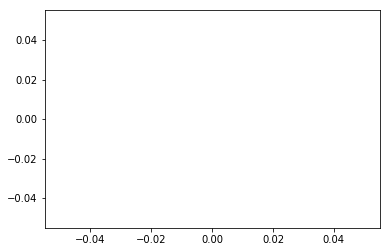

In [65]:
sns.distplot(listings['disttostation'])

In [71]:
import string

# define punctuation
punctuations = '''!()-[]{};:'"\<>.?@#$%^&*_~'''

# remove punctuation from the string
no_punct = ""
for char in listings['amenities'][0]:
   if char not in punctuations:
       no_punct = no_punct + char

# display the unpunctuated string
print(no_punct)

Wireless Internet,Air conditioning,Kitchen,Heating,Family/kid friendly,Essentials,Hair dryer,Iron,translation missing enhostingamenity50
